<a href="https://colab.research.google.com/github/fjaviergallucci/mia-ao-ag3/blob/master/Francisco_Gallucci_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Francisco Gallucci <br>
Link:    <br>
Github: <br>

### Carga de librerias

In [8]:
!pip install requests    #Hacer llamadas http a paginas de la red
!pip install tsplib95    #Modulo para las instancias del problema del TSP

^C
ERROR: Operation cancelled by user


### Descargar datos

In [25]:
import urllib.request  # Hacer llamadas http a paginas de la red
import tsplib95  # Modulo para las instancias del problema del TSP
import math  # Modulo de funciones matematicas. Se usa para exp
import random  # Para generar valores aleatorios
import os
import copy
from time import time
from IPython.display import display
import matplotlib.pyplot as plt

# http://elib.zib.de/pub/mp-testdata/tsp/tsplib/
# Documentacion :
# http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
# https://tsplib95.readthedocs.io/en/stable/pages/usage.html
# https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
# https://pypi.org/project/tsplib95/

# Descargamos el fichero de datos(Matriz de distancias)
problemas = {
    "burma14.tsp": "http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/burma14.tsp.gz",
    "gr24.tsp": "http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/gr24.tsp.gz",
    "swiss42.tsp": "http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz",
    # "pr76.tsp": "http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/pr76.tsp.gz",
    # "kroB100.tsp": "http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/kroB100.tsp.gz",
}
for file in problemas.keys():
    try:
        if not os.path.exists(f'./{file}'):
            urllib.request.urlretrieve(problemas[file], file + '.gz')
            !gzip -d {file}  # Descomprimir el fichero de datos
    except:
        pass

# Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

# Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)


In [ ]:
# #Carga de datos y generación de objeto problem
# ###############################################################################
# problem = tsplib95.load(file)

# #Nodos
# Nodos = list(problem.get_nodes())

# #Aristas
# Aristas = list(problem.get_edges())




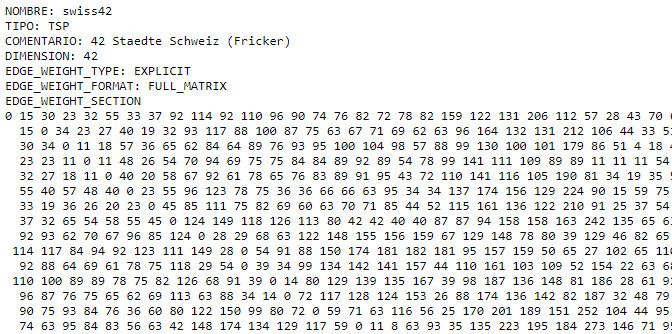

In [ ]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
# problem.get_weight(0, 1)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
                
#dir(problem)

15

### Funcionas basicas

In [10]:
 
#Funcionas basicas
###############################################################################      
     
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos): 
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion 

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)


 

### BUSQUEDA ALEATORIA (hecha en clase)

In [11]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################
# def busqueda_aleatoria(problem, N):
#   #N es el numero de iteraciones
#   Nodos = list(problem.get_nodes())
  
#   mejor_solucion = []
#   #mejor_distancia = 10e100                         #Inicializamos con un valor alto
#   mejor_distancia = float('inf')                    #Inicializamos con un valor alto
  
#   for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
#     solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
#     distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)
    
#     if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
#       mejor_solucion = solucion
#       mejor_distancia = distancia
      
      
#   print("Mejor solución:" , mejor_solucion) 
#   print("Distancia     :" , mejor_distancia) 
#   return mejor_solucion  

    
#Busqueda aleatoria con 5000 iteraciones    
# solucion = busqueda_aleatoria(problem, 10000)    

### BUSQUEDA LOCAL

In [ ]:
# ###############################################################################
# # BUSQUEDA LOCAL
# ###############################################################################
# def genera_vecina(solucion):
#   #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
#   #Se puede modificar para aplicar otros generadores distintos que 2-opt
#   #print(solucion)
#   mejor_solucion = []
#   mejor_distancia = 10e100
#   for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
#     for j in range(i+1, len(solucion)):
      
#       #Se genera una nueva solución intercambiando los dos nodos i,j:
#       #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
#       vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]   

#       #Se evalua la nueva solución ...
#       distancia_vecina = distancia_total(vecina, problem)         

#       #... para guardarla si mejora las anteriores
#       if distancia_vecina <= mejor_distancia:
#         mejor_distancia = distancia_vecina
#         mejor_solucion = vecina
#   return mejor_solucion


# #solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
# print("Distancia Solucion Incial:" , distancia_total(solucion, problem))
 

# nueva_solucion = genera_vecina(solucion)
# print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3636
Distancia Mejor Solucion Local: 3304


In [ ]:
# #Busqueda Local:
# #  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
# #  - Sin criterio de parada, se para cuando no es posible mejorar.
# def busqueda_local(problem):
#   mejor_solucion = []
  
#   #Generar una solucion inicial de referencia(aleatoria)
#   solucion_referencia = crear_solucion(Nodos)
#   mejor_distancia = distancia_total(solucion_referencia, problem)

#   iteracion=0             #Un contador para saber las iteraciones que hacemos
#   while(1):
#     iteracion +=1         #Incrementamos el contador
#     #print('#',iteracion)

#     #Obtenemos la mejor vecina ...
#     vecina = genera_vecina(solucion_referencia)

#     #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
#     distancia_vecina = distancia_total(vecina, problem)
 
#     #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
#     if distancia_vecina < mejor_distancia:
#       #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia 
#       mejor_solucion = vecina                   #Guarda la mejor solución encontrada
#       mejor_distancia = distancia_vecina

#     else:
#       print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion) 
#       print("Distancia     :" , mejor_distancia) 
#       return mejor_solucion
      
#     solucion_referencia = vecina
 
 
# sol = busqueda_local(problem )

En la iteracion  38 , la mejor solución encontrada es: [0, 39, 21, 40, 24, 38, 22, 8, 25, 11, 12, 26, 4, 3, 27, 2, 18, 10, 41, 23, 9, 29, 30, 28, 7, 37, 15, 16, 14, 19, 13, 5, 6, 1, 17, 31, 36, 35, 20, 33, 34, 32]
Distancia     : 1663


### SIMULATED ANNEALING


In [ ]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))
  
  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  
 
#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [ ]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo
  
  
  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
      
    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia  
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)
 
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 28, 29, 9, 23, 41, 11, 12, 18, 26, 2, 27, 3, 4, 6, 5, 13, 10, 25, 8, 31, 36, 35, 17, 37, 15, 32, 38, 22, 24, 40, 21, 39, 30, 1, 19, 14, 16, 7, 20, 34, 33]
con una distancia total de 1993


## Extra

### Clase solucion (extra)

In [12]:
class Solucion():
    def __init__(self, solucion):
        self.solucion = solucion
        self.distancia_total = 0
        self.hash_pesos = None

    def calcular_distancia_dos_nodos(self, inicio: int, fin: int, problem):
        weight = problem.get_weight(inicio, fin)
        if weight is None:
            return float("inf")
        return weight

    def calcular_distancia_total(self):
        # Se podria preguntar si la tabla de pesos ya fue creada o no. Si fue creada, solo sumo pesos. Si aun no ha sido creda, se manda a calcular los pesos, la cual tambien calcula la distancia
        # if self.hash_pesos is None:
        #     self.calcular_pesos(problem)
        #     return
        self.distancia_total = 0
        for i in range(len(self.solucion)-1):
            self.distancia_total += self.hash_pesos[str(i + (i+1))]

    def calcular_pesos(self, problem):
        self.distancia_total = 0
        self.hash_pesos = {}
        # A medida que recorremos la solucion para determinar pesos de un par de nodos, no solo sumamos la distancia entre nodos a la distancia total, tambien la guardamos en una tabla hash (diccionario este caso) para acceder a ella mas rapido en un futuro
        # La clave de la tabla hash seria la suma de los indices de los nodos relacionados, como string, por ejemplo la clave para los nodos en las posiciones 3 y 4, se guardaria como str(3+4):  {"7" : x }. Esto mantendra la integridad de las llaves, basicamente no se van a repetir nunca
        for i in range(len(self.solucion)-1):
            key = str(i + (i+1))
            self.hash_pesos[key] = self.calcular_distancia_dos_nodos(
                self.solucion[i], self.solucion[i+1],  problem)
            self.distancia_total += self.hash_pesos[key]

    def eliminar_peso_de_nodo_y_vecinos(self, indice_nodo: int):
        # Eliminamos el peso de la tabla hash y lo restamos del total
        # lo hacemos para ambos vecinos del nodo, anterior y siguiente
        key_vecino_anterior = str((indice_nodo-1) + indice_nodo)
        if key_vecino_anterior in self.hash_pesos:
            self.distancia_total -= self.hash_pesos[key_vecino_anterior]
            self.hash_pesos.pop(key_vecino_anterior)

        key_vecino_siguiente = str(indice_nodo + (indice_nodo+1))
        if key_vecino_siguiente in self.hash_pesos:
            self.distancia_total -= self.hash_pesos[key_vecino_siguiente]
            self.hash_pesos.pop(key_vecino_siguiente)

    def calcular_y_sumar_peso_nodos_vecinos(self, indice_nodo: int, problem):
        # Dado un nodo, calculamos el peso entre el y sus vecinos. Y la sumamos al total
        key = str((indice_nodo-1) + indice_nodo)
        if indice_nodo > 0 and key not in self.hash_pesos:
            self.hash_pesos[key] = self.calcular_distancia_dos_nodos(
                self.solucion[indice_nodo-1], self.solucion[indice_nodo], problem)
            self.distancia_total += self.hash_pesos[key]

        key = str(indice_nodo + (indice_nodo+1))
        if indice_nodo < len(self.solucion)-1 and key not in self.hash_pesos:
            self.hash_pesos[key] = self.calcular_distancia_dos_nodos(
                self.solucion[indice_nodo], self.solucion[indice_nodo+1], problem)
            self.distancia_total += self.hash_pesos[key]

    def intercambiar_nodos(self, nodo1: int, nodo2: int, problem):
        # Complejiad constante
        # Al intercambiar nodos, como ya todos los pesos de los nodos estan previamente calculados en la tablas hash
        # Solo re-calculamos los pesos de los nodos a intercambiar y sus vecinos.
        # Asi que solo tendremos que recalcular 4 distancias
        # Calculariamos solo: (nodo1-1, nodo1), (nodo1, nodo1+1), (nodo2-1, nodo2), (nodo2, nodo2+1)

        # Primero eliminamos los pesos de la tabla hash y los restamos del total previamente calculado
        self.eliminar_peso_de_nodo_y_vecinos(nodo1)
        self.eliminar_peso_de_nodo_y_vecinos(nodo2)

        # intercambiamos los nodos
        self.solucion[nodo1], self.solucion[nodo2] = self.solucion[nodo2], self.solucion[nodo1]

        # Calculamos nuevos pesos de lso nodos invertidos con sus vecinos y sumamos sus distancias al total
        self.calcular_y_sumar_peso_nodos_vecinos(nodo1, problem)
        self.calcular_y_sumar_peso_nodos_vecinos(nodo2, problem)

        # O, podemos mandar a sumar nuevamente todas las distancias. Pero de igual forma no se tiene que calcular los pesos de todos los nodos, porque ya estan en la tabla hash
        # self.calcular_distancia_total(problem)

        return

    def intercambiar_sublista_invertida(self, inicio: int, fin: int, problem):
        # Complejidad O(n)
        # Los nodos de la sublista son consecutivos, por lo que de la tabla hash de pesos, y de la distancia total, debemos quitar los pesos de los vecinos extremos de la sublsita, y la propia sublista. Quedando: (inicio-1, inicio), (nodos[inicio.....fin]), (nodos[fin], nodos[fin+1])
        lista_invertida = self.solucion[inicio:fin]
        lista_invertida.reverse()
        for i in range(inicio, fin):
            # primero eliminamos el peso calculado para este nodo y sus vecinos. Tambien se resta del total general
            self.eliminar_peso_de_nodo_y_vecinos(i)

            # En la posicion i-esima de la solucion, sustituimos por el nodo j-esimo en la sublista invertida. Siendo j = i-inicio
            self.solucion[i] = lista_invertida[i - inicio]

            # calculamos el nuevo peso entre i  e  i-1. Y la sumamos al total
            self.calcular_y_sumar_peso_nodos_vecinos(i, problem)

        return


### Vecindades o entornos (extra)

#### Vecindad Intercambio nodos (Hecho en clase)

In [13]:
# Algortimo original hecho en clase adaptado al uso de la clase creada para unificar las funciones
# Adicionalmente retornamos si encontro otra solucion
# Entorno Nº 1: Intercambiando nodos
def vecindad_intercambio_nodos(solucion: Solucion, problem):
    encontrada_mejor_solucion = False
    mejor_solucion = copy.deepcopy(solucion)
    for i in range(1, len(solucion.solucion)-1):
        for j in range(i+1, len(solucion.solucion)):
            vecina = copy.deepcopy(mejor_solucion)
            vecina.intercambiar_nodos(i, i+1, problem)
            if vecina.distancia_total <= mejor_solucion.distancia_total:
                mejor_solucion = vecina

    return mejor_solucion, encontrada_mejor_solucion


#### Vecindad intercambio sublista invertida (extra)

In [14]:
# Algortimo adicional para cumplir con el entorno variable
# Entorno Nº 2: Usando sub-lista e invirtiendo
# Complejidad: ¿ O(n/2) ?
def vecindad_sub_lista_invertida(solucion: Solucion, problem):
    # Condicion de parada sera que llegue al maximo de iteraciones
    # O, consiga una mejor solucion. En este caso, regresara a  la busqueda por entorno variable y volvera a probar con el entorno= 0
    cantidad_iteraciones = 0
    while(cantidad_iteraciones < len(solucion.solucion) // 2):
        # Determinamos un tamaño de la sublista variable en cada iteracion. Minimo 2
        length_sub_lista = random.randint(2, len(solucion.solucion) // 2)
        # Determinamos aleatoriamente partir de que indice vamos a tomar la sublista
        indice_inicio_sub_lista = random.randint(
            0, (len(solucion.solucion)-length_sub_lista-2))
        indice_fin_sub_lista = indice_inicio_sub_lista+length_sub_lista

        vecina = copy.deepcopy(solucion)
        vecina.intercambiar_sublista_invertida(
            indice_inicio_sub_lista, indice_fin_sub_lista, problem)

        # Luego de sustituir por la sublista invertida, pregutnamos si es mejor. y si es asi, retornamos
        if vecina.distancia_total < solucion.distancia_total:
            return vecina, True

        cantidad_iteraciones += 1

    return solucion, False


### Busquedas (extra)

In [22]:
#Busqueda aleatoria hecha en clase pero adaptada para usar clase Solucion
def busqueda_aleatoria(problem, N):
    # N es el numero de iteraciones
    Nodos = list(problem.get_nodes())

    mejor_solucion = Solucion([])
    mejor_solucion.distancia_total = float("inf")

    for i in range(N):  # Criterio de parada: repetir N veces pero podemos incluir otros
        # Genera una solucion aleatoria
        solucion = Solucion(crear_solucion(Nodos))
        # Calcula el valor objetivo(distancia total)

        solucion.calcular_pesos(problem)
        solucion.calcular_distancia_total()

        if solucion.distancia_total < mejor_solucion.distancia_total:  # Compara con la mejor obtenida hasta ahora
            mejor_solucion = solucion

    # print("Mejor solución:", mejor_solucion.solucion)
    # print("Distancia     :", mejor_solucion.distancia_total)
    return mejor_solucion

#### Busqueda local monotona con entorno intercambio de nodos

In [15]:
# Algoritmo original hecho en clase, adaptado a usar la clase Solucion
# Busqueda Local:
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local_intercambio_nodos(problem, solucion: Solucion):
    solucion_referencia = copy.deepcopy(solucion)
    mejor_solucion = copy.deepcopy(solucion)

    iteracion = 0
    while(1):
        iteracion += 1
        vecina, _ = vecindad_intercambio_nodos(solucion_referencia, problem)

        # Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
        if vecina.distancia_total < mejor_solucion.distancia_total:
            # mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
            mejor_solucion = vecina

        else:
            # print("En la iteracion ", iteracion,
            #       ", la mejor solución encontrada es:", mejor_solucion.solucion)
            # print("Distancia     :", mejor_solucion.distancia_total)
            return mejor_solucion

        solucion_referencia = vecina


#### Busqueda local monotona con sublista invertida

In [16]:
#Condicion de parada es un maximo de iteraciones de nodos//3
#Si consige mejor solucion, regresa la iteracion a 0
def busqueda_local_lista_invertida(problem, solucion: Solucion):
    cantidad_iteraciones = 0
    mejor_solucion = copy.deepcopy(solucion)
    while(cantidad_iteraciones < len(mejor_solucion.solucion) // 3):
        vecina, movido = vecindad_sub_lista_invertida(
            copy.deepcopy(mejor_solucion), problem)
        if movido:
            mejor_solucion = vecina
            cantidad_iteraciones = 0
        else:
            cantidad_iteraciones += 1

    return mejor_solucion


#### Busqueda por entornos variables descendente (Intercambio de nodos + sublista invertida)

In [20]:
def busqueda_por_entornos_variables_descendente(problem, solucion: Solucion):
    entornos = [vecindad_intercambio_nodos, vecindad_sub_lista_invertida]
    mejor_solucion = copy.deepcopy(solucion)  # crear_solucion(Nodos)
    iteracion = 0
    while(iteracion < len(entornos)):
        nueva_solucion, movido = entornos[iteracion](mejor_solucion, problem)

        if movido:
            mejor_solucion = nueva_solucion
            iteracion = 0
        else:
            iteracion += 1

    return mejor_solucion


### Resultados y grafica

Problema burma14.tsp

Solucion busqueda aleatoria propuesta
[1, 9, 10, 8, 2, 7, 5, 13, 12, 6, 11, 3, 4, 14]
Distancia: 4799


Solucion busqueda local monotona con intercambio de nodos: burma14.tsp
Solución encontrada es: [1, 10, 9, 8, 2, 5, 7, 13, 6, 12, 11, 14, 3, 4]
Distancia: 4483
Tiempo de ejecucion: 0.011287212371826172


Solucion busqueda local monotona con lista invertida: burma14.tsp
Solución encontrada es: [5, 6, 12, 7, 11, 9, 10, 13, 8, 1, 2, 3, 4, 14]
Distancia: 3490
Tiempo de ejecucion: 0.009488105773925781


Solucion busqueda por entornos variables descendente (intercambio de nodos + lista invertida): burma14.tsp
Solución encontrada es: [9, 10, 8, 2, 1, 11, 13, 6, 12, 7, 5, 3, 4, 14]
Distancia: 3827
Tiempo de ejecucion: 0.02614879608154297

Problema gr24.tsp

Solucion busqueda aleatoria propuesta
[0, 13, 16, 6, 9, 3, 12, 8, 11, 5, 10, 2, 23, 7, 22, 20, 19, 1, 14, 17, 15, 21, 18, 4]
Distancia: 2683


Solucion busqueda local monotona con intercambio de nodos: gr24.tsp
Soluci

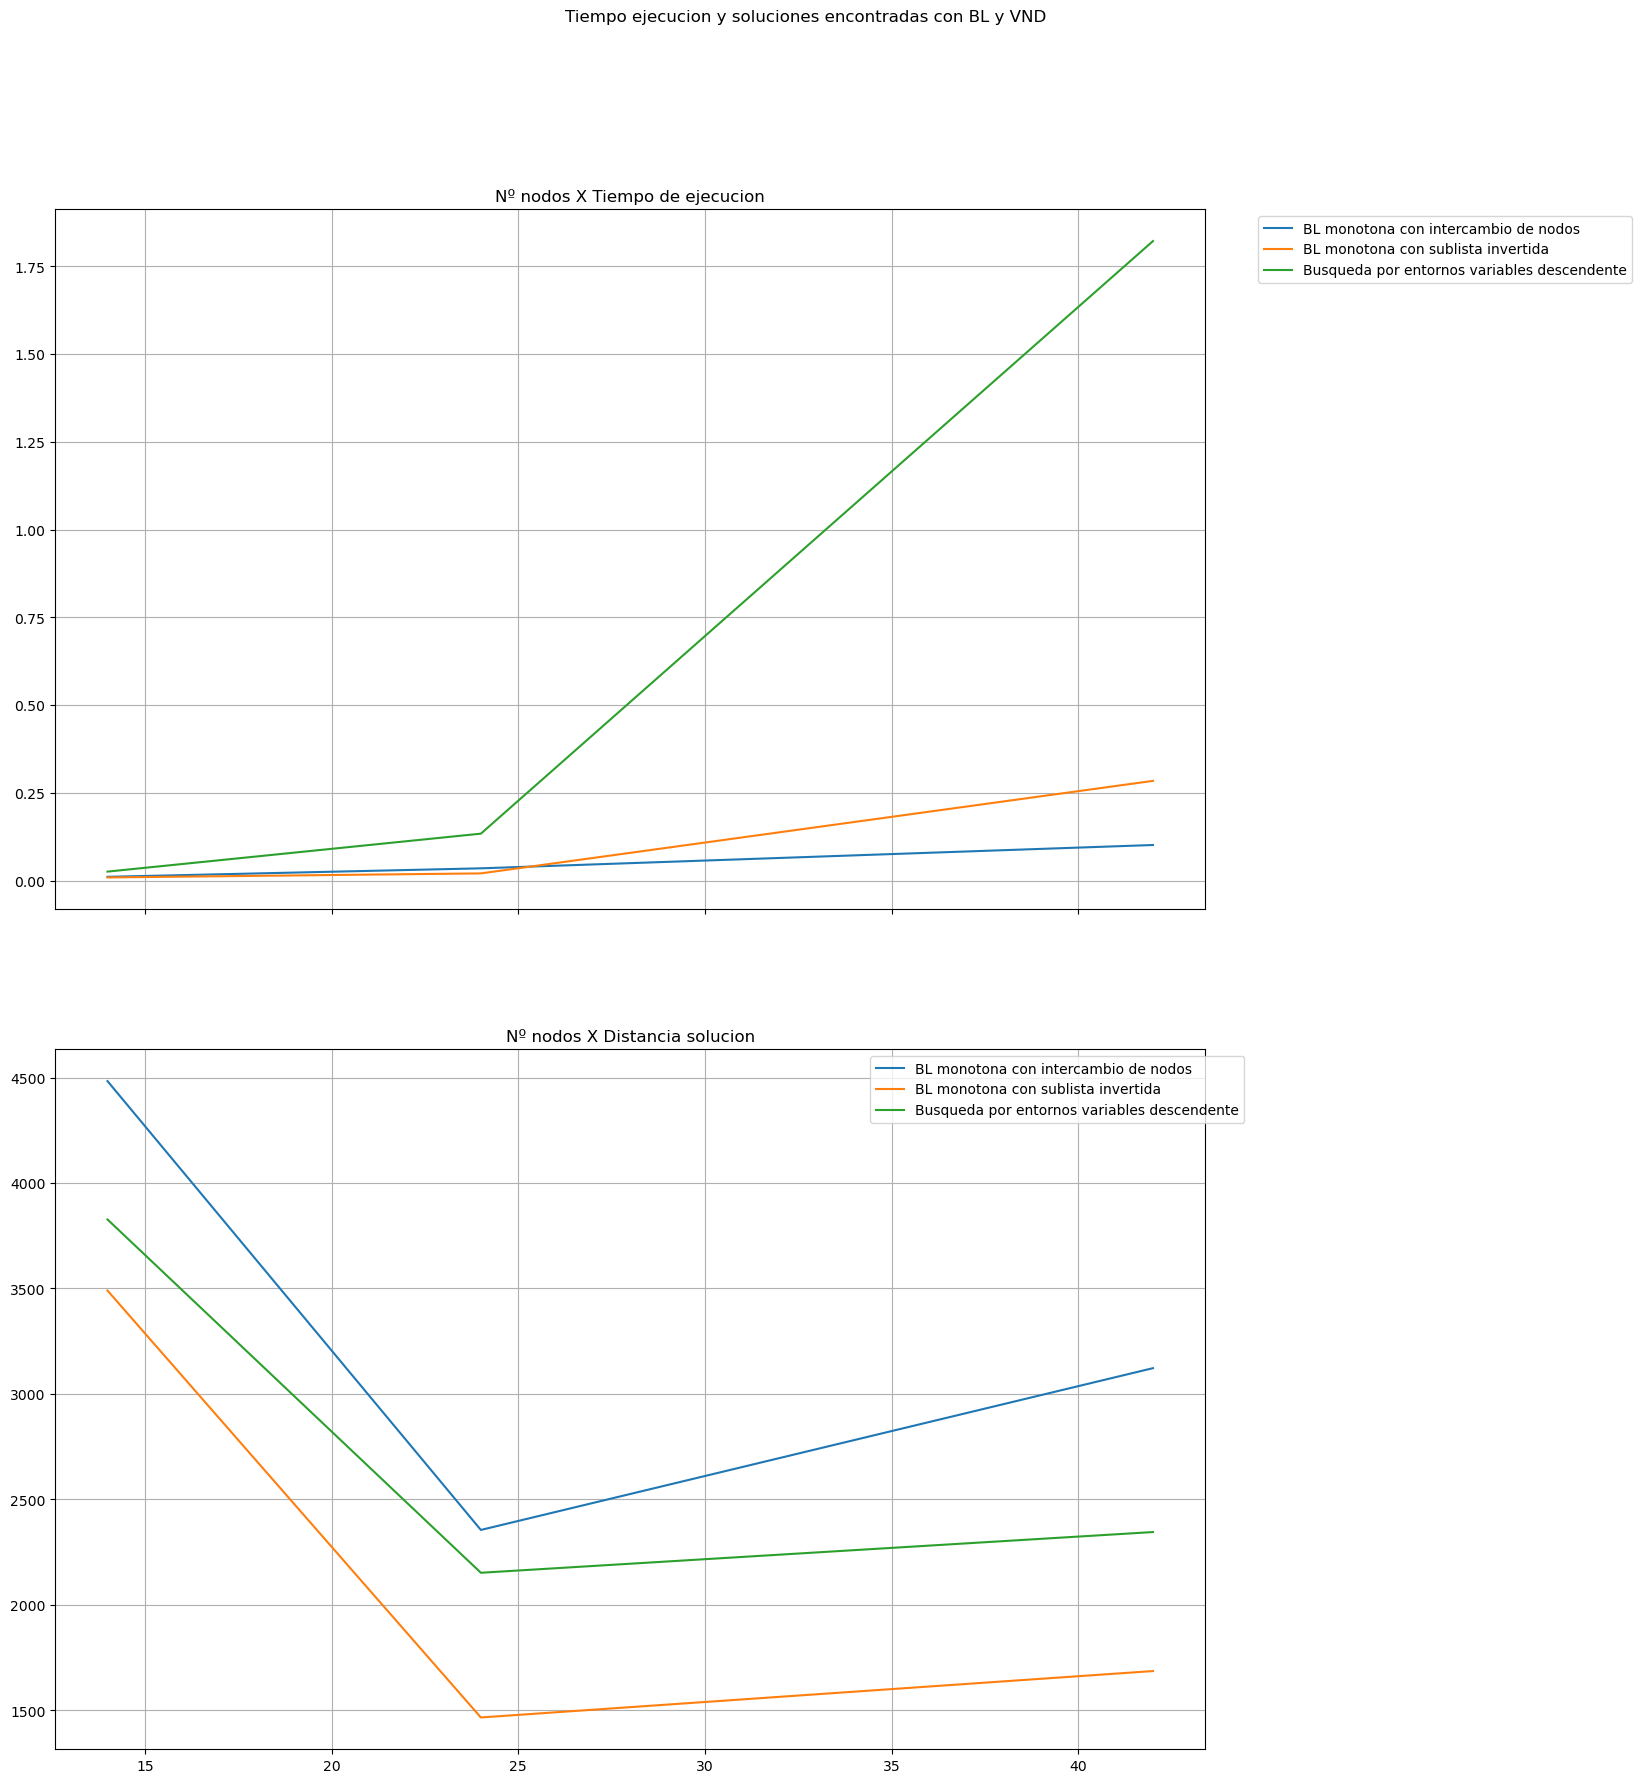

In [27]:
cantidad_nodos = []
tiempos_busqueda_local_nodos_invertidos = []
tiempos_busqueda_local_sublista_invertida = []
tiempos_busqueda_entorno_variable = []

distancias_busqueda_local_nodos_invertidos = []
distancias_busqueda_local_sublista_invertida = []
distancias_busqueda_entorno_variable = []

for file in problemas.keys():
    print(f'Problema {file}')
    problem = tsplib95.load(file)
    nodos = list(problem.get_nodes())
    cantidad_nodos.append(len(nodos))

    solucion_propuesta = busqueda_aleatoria(problem, len(nodos))
    print("\nSolucion busqueda aleatoria propuesta")
    print(solucion_propuesta.solucion)
    print(f'Distancia: {solucion_propuesta.distancia_total}\n')

    time_start = time()
    print(
        f'\nSolucion busqueda local monotona con intercambio de nodos: {file}')
    sol1 = busqueda_local_intercambio_nodos(problem, solucion_propuesta)
    time_end = time()
    tiempos_busqueda_local_nodos_invertidos.append(time_end-time_start)
    distancias_busqueda_local_nodos_invertidos.append(sol1.distancia_total)
    print("Solución encontrada es:", sol1.solucion)
    print("Distancia:", sol1.distancia_total)
    print(f'Tiempo de ejecucion: {time_end-time_start}\n')

    time_start = time()
    print(f'\nSolucion busqueda local monotona con lista invertida: {file}')
    sol2 = busqueda_local_lista_invertida(problem, solucion_propuesta)
    time_end = time()
    tiempos_busqueda_local_sublista_invertida.append(time_end-time_start)
    distancias_busqueda_local_sublista_invertida.append(sol2.distancia_total)
    print("Solución encontrada es:", sol2.solucion)
    print("Distancia:", sol2.distancia_total)
    print(f'Tiempo de ejecucion: {time_end-time_start}\n')

    time_start = time()
    print(
        f'\nSolucion busqueda por entornos variables descendente (intercambio de nodos + lista invertida): {file}')
    sol3 = busqueda_por_entornos_variables_descendente(
        problem, solucion_propuesta)
    time_end = time()
    tiempos_busqueda_entorno_variable.append(time_end-time_start)
    distancias_busqueda_entorno_variable.append(sol3.distancia_total)
    print("Solución encontrada es:", sol3.solucion)
    print("Distancia:", sol3.distancia_total)
    print(f'Tiempo de ejecucion: {time_end-time_start}\n')


fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20, 20))
fig.suptitle('Tiempo ejecucion y soluciones encontradas con BL y VND')

ax1.set_title("Nº nodos X Tiempo de ejecucion")
ax1.plot(cantidad_nodos, tiempos_busqueda_local_nodos_invertidos,
         label="BL monotona con intercambio de nodos")
ax1.plot(cantidad_nodos, tiempos_busqueda_local_sublista_invertida,
         label="BL monotona con sublista invertida")
ax1.plot(cantidad_nodos, tiempos_busqueda_entorno_variable,
         label="Busqueda por entornos variables descendente")
ax1.grid()
ax1.legend(bbox_to_anchor=(1.04, 1))

ax2.set_title("Nº nodos X Distancia solucion")
ax2.plot(cantidad_nodos, distancias_busqueda_local_nodos_invertidos,
         label="BL monotona con intercambio de nodos")
ax2.plot(cantidad_nodos, distancias_busqueda_local_sublista_invertida,
         label="BL monotona con sublista invertida")
ax2.plot(cantidad_nodos, distancias_busqueda_entorno_variable,
         label="Busqueda por entornos variables descendente")
ax2.grid()
ax2.legend(bbox_to_anchor=(1.04, 1))

fig.subplots_adjust(right=0.70)

plt.show()
